In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, InputLayer, Dropout, Activation, Flatten, Conv2D
import tensorflow as tf
import numpy as np
import shutil
import random
import cv2
import os



C:\Users\DanilAdmin\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DanilAdmin\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DanilAdmin\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\DanilAdmin\anaconda3\envs\tensorfl

In [2]:
# creating train / val /test
root_dir = 'cell_images/'
new_root = 'AllDatasets/'
classes = ['Parasitized', 'Uninfected']

for cls in classes:
    os.makedirs(root_dir + new_root+ 'train/' + cls)
    os.makedirs(root_dir +new_root +'val/' + cls)
    os.makedirs(root_dir +new_root + 'test/' + cls)
    
## creating partition of the data after shuffeling

for cls in classes:
    src = root_dir + cls # folder to copy images from
    print(src)

    allFileNames = os.listdir(src)
    np.random.shuffle(allFileNames)

    ## here 0.75 = training ratio , (0.95-0.75) = validation ratio , (1-0.95) =  
    ##training ratio  
    train_FileNames,val_FileNames,test_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)*0.75),int(len(allFileNames)*0.95)])

    # #Converting file names from array to list

    train_FileNames = [src+'/'+ name for name in train_FileNames]
    val_FileNames = [src+'/' + name for name in val_FileNames]
    test_FileNames = [src+'/' + name for name in test_FileNames]

    print('Total images  : '+ cls + ' ' +str(len(allFileNames)))
    print('Training : '+ cls + ' '+str(len(train_FileNames)))
    print('Validation : '+ cls + ' ' +str(len(val_FileNames)))
    print('Testing : '+ cls + ' '+str(len(test_FileNames)))
    
    ## Copy pasting images to target directory

    for name in train_FileNames:
        shutil.copy(name, root_dir + new_root+'train/'+cls )


    for name in val_FileNames:
        shutil.copy(name, root_dir +new_root+'val/'+cls )


    for name in test_FileNames:
        shutil.copy(name,root_dir + new_root+'test/'+cls )

cell_images/Parasitized
Total images  : Parasitized 13780
Training : Parasitized 10335
Validation : Parasitized 2756
Testing : Parasitized 689
cell_images/Uninfected
Total images  : Uninfected 13780
Training : Uninfected 10335
Validation : Uninfected 2756
Testing : Uninfected 689


In [2]:
IMG_WIDTH=128
IMG_HEIGHT=128
img_folder=r'C:\Users\DanilAdmin\malaria\cell_images\AllDatasets\train'

In [3]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
                image_path= os.path.join(img_folder, dir1,  file)
                image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
                if image is not None:
                    image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
                    image=np.array(image)
                    image = image.astype('float32')
                    image /= 255 
                    img_data_array.append(image)
                    class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
X_train, Y_train =create_dataset(r'C:\Users\DanilAdmin\malaria\cell_images\AllDatasets\train')
X_val, Y_val =create_dataset(r'C:\Users\DanilAdmin\malaria\cell_images\AllDatasets\val')
X_test, Y_test =create_dataset(r'C:\Users\DanilAdmin\malaria\cell_images\AllDatasets\test')

In [4]:
target_dict={k: v for v, k in enumerate(np.unique(Y_train))}
target_dict

{'Parasitized': 0, 'Uninfected': 1}

In [9]:
target_val_train=[target_dict[Y_train[i]] for i in range(len(Y_train))]
target_val_val=[target_dict[Y_val[i]] for i in range(len(Y_val))]
target_val_test=[target_dict[Y_test[i]] for i in range(len(Y_test))]

In [6]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), padding='same', activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding='same', activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(2,activation="softmax")
        ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
history = model.fit(x=np.array(X_train, np.float32),
                    y=np.array(list(map(int,target_val_train)), np.float32), 
                    batch_size=64, 
                    epochs=10, 
                    validation_data=(np.array(X_val, np.float32), np.array(list(map(int,target_val_val)), np.float32))
                   )

Train on 20668 samples, validate on 5512 samples
Epoch 1/10
20668/20668 [==============================] - 981s 47ms/sample - loss: 0.6633 - acc: 0.6159 - val_loss: 0.5973 - val_acc: 0.6767
Epoch 2/10
20668/20668 [==============================] - 352s 17ms/sample - loss: 0.5601 - acc: 0.7242 - val_loss: 0.5027 - val_acc: 0.7761
Epoch 3/10
20668/20668 [==============================] - 139s 7ms/sample - loss: 0.4561 - acc: 0.8138 - val_loss: 0.4123 - val_acc: 0.8240
Epoch 4/10
20668/20668 [==============================] - 154s 7ms/sample - loss: 0.3680 - acc: 0.8658 - val_loss: 0.4202 - val_acc: 0.8104
Epoch 5/10
20668/20668 [==============================] - 152s 7ms/sample - loss: 0.3268 - acc: 0.8851 - val_loss: 0.4159 - val_acc: 0.8104
Epoch 6/10
20668/20668 [==============================] - 206s 10ms/sample - loss: 0.2826 - acc: 0.9036 - val_loss: 0.4075 - val_acc: 0.8182
Epoch 7/10
20668/20668 [==============================] - 152s 7ms/sample - loss: 0.2457 - acc: 0.9213 - val

In [10]:
print("Evaluate on test data")
results = model.evaluate(np.array(X_test, np.float32), np.array(list(map(int,target_val_test)), np.float32), batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
1378/1378 [==============================] - 3s 2ms/sample - loss: 0.4369 - acc: 0.8462
test loss, test acc: [0.4369001638560579, 0.84615386]


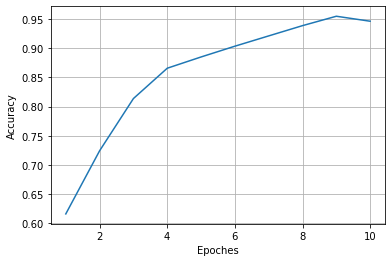

In [16]:
import matplotlib.pyplot as plt
epoches=np.linspace(1,10,10)

fig, ax = plt.subplots()

ax.plot(epoches, history.history['acc'])
ax.grid()

ax.set_xlabel('Epoches')
ax.set_ylabel('Accuracy')

plt.show()